<a href="https://colab.research.google.com/github/dearishanti/kampus-merdeka-chatbot-kadekbot-/blob/main/chatbot_kadek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prepare dataset
import json
import pandas as pd

with open("/content/drive/MyDrive/Dataset Kampus Merdeka.json") as data_file:
    data = json.load(data_file)

In [ ]:
text_input = []
intents = []
responses = []
ignore_letters = ['!', '?', ',', '.', '[]']

for intent in data['intents']:
    for input in intent['input']:
        text_input.append(input)
        intents.append(intent['tag'])
        responses.append(intent['responses'])

df = pd.DataFrame({'text_input': text_input,
                    'intents': intents,
                   "responses":responses})

df.head()

,text_input,intents,responses
0,hallo,greeting,[Hai! Kadekbot di sini. Mau tau informasi tent...
1,hai,greeting,[Hai! Kadekbot di sini. Mau tau informasi tent...
2,halo,greeting,[Hai! Kadekbot di sini. Mau tau informasi tent...
3,hei,greeting,[Hai! Kadekbot di sini. Mau tau informasi tent...
4,hi,greeting,[Hai! Kadekbot di sini. Mau tau informasi tent...


In [ ]:
df.intents.value_counts()

greeting                                        15
program_kampus_merdeka                          11
goodbye                                          9
terimakasih                                      5
persyaratan_IISMA                                2
manfaat_PMMB                                     1
periode_dan_pendaftaran_pertukaran_mahasiswa     1
periode_dan_pendaftaran_IISMA                    1
manfaat_IISMA                                    1
mitra_IISMA                                      1
penjelasan_pertukaran_mahasiswa                  1
persyaratan_pertukaran_mahasiswa                 1
manfaat_pertukaran_mahasiswa                     1
periode_dan_pendaftaran_PMMB                     1
penjelasan_IISMA                                 1
persyaratan_pejuang_muda                         1
periode_dan_pendaftaran_pejuang_muda             1
manfaat_pejuang_muda                             1
penjelasan_PMMB                                  1
penjelasan_pejuang_muda        

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [ ]:
# lemmaztize and lower each word and remove duplicates
intents = [lemmatizer.lemmatize(w.lower()) for w in intents if w not in ignore_letters]
intents = sorted(list(set(intents)))
text_input = sorted(list(set(text_input)))
print (len(responses), "responses")
print (len(text_input), "input", text_input)
print (len(intents), "unique lemmatized tag", intents)

75 responses
74 input ['Apa itu IISMA?', 'Apa itu Kampus Mengajar?', 'Apa itu Kampus Merdeka?', 'Apa itu Magang Bersertifikat?', 'Apa itu PMMB?', 'Apa itu Pejuang Muda?', 'Apa itu Pertukaran Mahasiswa Merdeka?', 'Apa itu studi independen?', 'Apa persyaratan mengikuti Kampus Merdeka?', 'Apa saja manfaat apabila mengikuti IISMA?', 'Apa saja manfaat apabila mengikuti Kampus Mengajar?', 'Apa saja manfaat apabila mengikuti Magang Bersertifikat?', 'Apa saja manfaat apabila mengikuti PMMB?', 'Apa saja manfaat apabila mengikuti Pejuang Muda?', 'Apa saja manfaat apabila mengikuti Pertukaran Mahasiswa Merdeka?', 'Apa saja manfaat apabila mengikuti Studi Independen?', 'Apa saja mitra yang tergabung dalam Magang Bersertifikat?', 'Apa saja mitra yang tergabung dalam Studi Independen?', 'Apa saja persyaratan IISMA?', 'Apa saja persyaratan Kampus Mengajar?', 'Apa saja persyaratan Magang Bersertifikat?', 'Apa saja persyaratan Pejuang Muda?', 'Apa saja persyaratan Pertukaran Mahasiswa Merdeka?', 'Apa s

In [ ]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(df['text_input'])
train = tokenizer.texts_to_sequences(df['text_input'])
vocab_size = len(tokenizer.word_index)+1
print('vocab_size : {}'.format(vocab_size))

#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(train)

vocab_size : 70


In [ ]:
# data cleansing
import string

# convert lowercase
df.text_input = df.text_input.apply(lambda x: x.lower())

# remove punctuation
exclude = set(string.punctuation)
df.text_input = df.text_input.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_train = le.fit_transform(df.intents)
y_train = to_categorical(y_train)

In [ ]:
all_vocab = []
length = []

for idx, row in df.iterrows():
    sent = row['text_input']
    [all_vocab.append(i) for i in sent.split()]
    length.append(len(sent.split()))

In [ ]:
len(all_vocab)

282

In [ ]:
max(length)

10

In [ ]:
len(set(all_vocab))

69

In [ ]:
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 69
max_length = 10

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize='lower_and_strip_punctuation',
                                       split='whitespace',
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length
                                       )


In [ ]:
text_vectorization.adapt(df.text_input)

In [ ]:
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'apa',
 'saja',
 'program',
 'merdeka',
 'kampus',
 'persyaratan',
 'mengikuti',
 'itu',
 'periode',
 'pelaksanaan',
 'mendaftar',
 'manfaat',
 'iisma',
 'dan',
 'cara',
 'bagaimana',
 'apabila',
 'studi',
 'magang',
 'independen',
 'pmmb',
 'pertukaran',
 'pejuang',
 'muda',
 'mengajar',
 'mahasiswa',
 'bersertifikat',
 'yang',
 'tergabung',
 'dalam',
 'you',
 'universitas',
 'terima',
 'mitra',
 'kasih',
 'bye',
 'tujuan',
 'tinggal',
 'thanks',
 'thank',
 'sore',
 'sis',
 'siang',
 'selamat',
 'see',
 'sampai',
 'pagi',
 'morning',
 'malam',
 'makasih',
 'kemensos',
 'kemendikbud',
 'kawan',
 'jumpa',
 'hy',
 'hi',
 'hei',
 'halo',
 'hallo',
 'hai',
 'good',
 'dah',
 'dadah',
 'byee',
 'bumn',
 'bro',
 'banyak']

In [ ]:
text_vectorization('Apa itu Kampus Merdeka?')

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([2, 9, 6, 5, 0, 0, 0, 0, 0, 0])>

In [ ]:
text_vectorization.get_vocabulary()[0]

''

In [ ]:
from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim=max_vocab_length,
                      output_dim=75,
                      embeddings_initializer="uniform",
                      input_length=max_length)

In [ ]:
import numpy as np
res_embed = embedding(np.array([[2, 9, 6, 5, 0, 0, 0, 0, 0, 0]]))
res_embed

<tf.Tensor: shape=(1, 10, 75), dtype=float32, numpy=
array([[[ 0.00731296,  0.01294455, -0.03024294, -0.0427697 ,
         -0.0238254 , -0.0430975 , -0.01853722, -0.00374181,
          0.00366175,  0.04335696, -0.00519579, -0.01109439,
         -0.03137083,  0.04930177, -0.04918091, -0.03057951,
         -0.00104671, -0.04462874, -0.00906848, -0.00699047,
         -0.01361133, -0.0488851 , -0.03028681,  0.01296609,
          0.01159309,  0.02440393, -0.04156294, -0.01547307,
          0.01391791,  0.04757612, -0.00395151, -0.02837032,
         -0.02403945, -0.04347079, -0.02457579,  0.04109478,
         -0.02274173,  0.01658667, -0.04130688,  0.01636756,
         -0.02309519,  0.04802663, -0.02675378,  0.03360783,
          0.04302916, -0.0110425 ,  0.03635648,  0.0232462 ,
         -0.04311094,  0.02543683, -0.02641608,  0.00706047,
          0.0081761 , -0.00776178,  0.02873738,  0.03330128,
         -0.01117216, -0.01443869, -0.01610364,  0.00106121,
          0.0411129 , -0.0361675

In [ ]:
# modelling
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, LSTM
inputs = Input(shape=(1,), dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = LSTM(74)(x)
outputs = Dense(38, activation='softmax')(x)
model_lstm = Model(inputs, outputs, name="LSTM_model")

In [ ]:
# compile model
model_lstm.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=["accuracy"])

In [ ]:
history = model_lstm.fit(df.text_input,
               y_train,
               epochs=200,
               verbose=0,
               validation_split=0.0)

In [ ]:
loss, acc = model_lstm.evaluate(df.text_input, y_train)
print(f'Test Accuracy: {acc*100:.3f}%')

3/3 [==============================] - 1s 5ms/step - loss: 0.1764 - accuracy: 0.9867
Test Accuracy: 98.667%


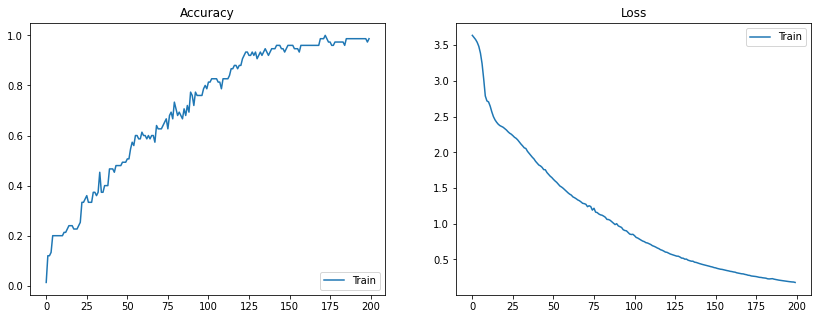

In [ ]:
epochs = 200
import matplotlib.pyplot as plt

acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Train')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
model_lstm.save("kadekbot_model.json")

INFO:tensorflow:Assets written to: kadekbot_model.json/assets


INFO:tensorflow:Assets written to: kadekbot_model.json/assets


In [ ]:
import pickle
le_filename = open("label_encoder.pickle", "wb")
pickle.dump(le, le_filename)
le_filename.close()